In [1]:
import os
import pandas as pd, numpy as np
from glob import glob
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns 

from PIL import Image
import cv2

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_bbox = pd.read_csv('/kaggle/input/data/BBox_List_2017.csv')
df_bbox = df_bbox.drop(columns=df_bbox.columns[-3:].tolist())
df_bbox.rename(columns={'Bbox [x': 'x', 'h]': 'h'}, inplace=True)
df_bbox

,Image Index,Finding Label,x,y,w,h
0,00013118_008.png,Atelectasis,225.084746,547.019217,86.779661,79.186441
1,00014716_007.png,Atelectasis,686.101695,131.543498,185.491525,313.491525
2,00029817_009.png,Atelectasis,221.830508,317.053115,155.118644,216.949153
3,00014687_001.png,Atelectasis,726.237288,494.951420,141.016949,55.322034
4,00017877_001.png,Atelectasis,660.067797,569.780787,200.677966,78.101695
...,...,...,...,...,...,...
979,00029464_015.png,Atelectasis,198.940451,352.900747,615.537778,323.128889
980,00025769_001.png,Atelectasis,701.838229,572.491858,103.537778,63.715556
981,00016837_002.png,Atelectasis,140.913785,658.962969,271.928889,94.435556
982,00020124_003.png,Atelectasis,175.047118,580.456302,244.622222,103.537778


**Width: 1024**

**Height: 1024**

In [3]:
df_bbox['height'] = 1024
df_bbox['width'] = 1024

In [4]:
df_bbox = df_bbox[df_bbox['Finding Label'].isin(['Pneumonia','Cardiomegaly','Effusion','Atelectasis'])]

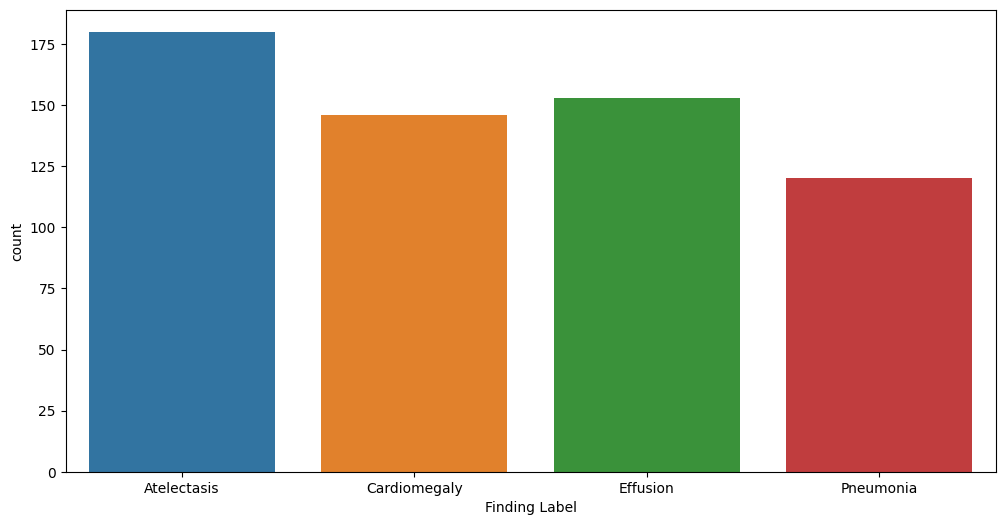

In [5]:
plt.figure(figsize=(12,6))

sns.countplot(x=df_bbox['Finding Label'])

plt.show()

In [6]:
mapping_path = {os.path.basename(x): x for x in glob('../input/data/*/images/*.png')}

df_bbox['path'] = df_bbox['Image Index'].map(mapping_path)

In [7]:
df_bbox.to_csv('metadata.csv', index=False)

In [8]:
import shutil

In [9]:
PATH = '/kaggle/working/nih_label/'

for label in df_bbox['Finding Label'].unique():
    os.makedirs(os.path.join(PATH,label), exist_ok=True)
    
    tmp = df_bbox[df_bbox['Finding Label'] == label].reset_index(drop=True)
    
    for file in tqdm(tmp['path'].unique()):
        shutil.copy(file, os.path.join(PATH,label))

100%|██████████| 120/120 [00:01<00:00, 70.07it/s]
